In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

In [40]:
dataset = pd.read_csv('data_temp/100_gauge.csv', index_col=False)

In [41]:
dataset.head()

,2m_temp_max,2m_temp_mean,2m_temp_min,2m_dp_temp_max,2m_dp_temp_mean,2m_dp_temp_min,10m_wind_u,10m_wind_v,fcst_alb,lai_high_veg,...,P,PCRPS,PERA5,PMSW,PET,ET0,ETA,Q2,Date,Timestamp
0,-2.5,-5.3,-8.0,-4.1,-7.3,-11.2,1.7,0.9,0.44,2.3,...,5.27,4.65,5.06,4.69,6.34,2.29,1.38,5.89,1981-01-01,347155200
1,3.4,1.3,-1.1,0.4,-2.9,-7.1,5.2,0.5,0.15,1.9,...,2.16,1.79,2.23,1.56,3.23,2.36,1.64,0.53,1981-01-01,347155200
2,-0.2,-2.5,-6.4,-2.3,-5.7,-9.7,3.4,-0.1,0.39,1.8,...,4.45,3.94,4.02,3.90,4.97,2.17,1.57,3.27,1981-01-01,347155200
3,1.0,-2.1,-4.8,-2.5,-5.8,-8.8,4.2,-1.3,0.39,1.6,...,3.46,3.07,3.42,3.31,5.13,2.19,1.68,2.02,1981-01-01,347155200
4,4.0,-2.1,-7.7,-1.5,-5.8,-9.7,2.2,-0.9,0.32,1.2,...,2.64,2.54,2.98,2.46,3.52,2.50,1.65,0.68,1981-01-01,347155200


In [43]:
split_index = int(0.7 * len(dataset))

In [44]:
X = dataset.drop(['prec'], axis=1)
y = dataset['prec']

In [45]:
X_train, X_test, y_train, y_test = X.iloc[:split_index], X.iloc[split_index:], y.iloc[:split_index], y.iloc[split_index:]

In [46]:
X_train.head()

,2m_temp_max,2m_temp_mean,2m_temp_min,2m_dp_temp_max,2m_dp_temp_mean,2m_dp_temp_min,10m_wind_u,10m_wind_v,fcst_alb,lai_high_veg,...,dist_hup,P,PCRPS,PERA5,PMSW,PET,ET0,ETA,Q2,Timestamp
0,-2.5,-5.3,-8.0,-4.1,-7.3,-11.2,1.7,0.9,0.44,2.3,...,8.0,5.27,4.65,5.06,4.69,6.34,2.29,1.38,5.89,347155200
1,3.4,1.3,-1.1,0.4,-2.9,-7.1,5.2,0.5,0.15,1.9,...,208.0,2.16,1.79,2.23,1.56,3.23,2.36,1.64,0.53,347155200
2,-0.2,-2.5,-6.4,-2.3,-5.7,-9.7,3.4,-0.1,0.39,1.8,...,131.0,4.45,3.94,4.02,3.90,4.97,2.17,1.57,3.27,347155200
3,1.0,-2.1,-4.8,-2.5,-5.8,-8.8,4.2,-1.3,0.39,1.6,...,11.3,3.46,3.07,3.42,3.31,5.13,2.19,1.68,2.02,347155200
4,4.0,-2.1,-7.7,-1.5,-5.8,-9.7,2.2,-0.9,0.32,1.2,...,57.0,2.64,2.54,2.98,2.46,3.52,2.50,1.65,0.68,347155200


In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd
import matplotlib.pyplot as plt


In [59]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
linear_model = LinearRegression()

# Trainiere das Modell
linear_model.fit(X_train, y_train)

LinearRegression()

In [61]:
y_pred = linear_model.predict(X_test)

# Berechne den Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 20.921511658112397
Root Mean Squared Error: 4.5740038979118065


In [62]:
results_df = pd.DataFrame({'ID': X_test['ID'], 'Timestamp': X_test['Timestamp'],  'Actual': y_test, 'Predicted': y_pred})

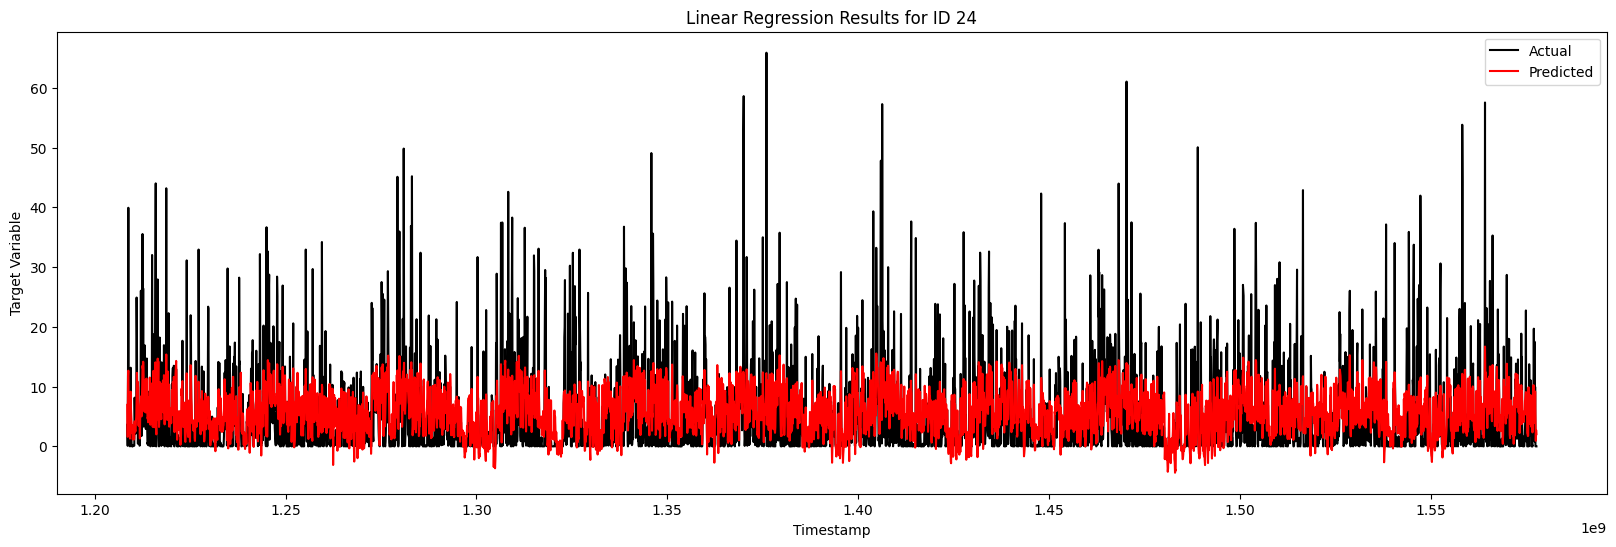

In [69]:
specific_id = 24
filtered_results = results_df[results_df['ID'] == specific_id]

plt.figure(figsize=(20, 6))

# Plot für unterschiedliche Zeitpunkte mit Linien
plt.plot(filtered_results['Timestamp'], filtered_results['Actual'], color='black', label='Actual')
plt.plot(filtered_results['Timestamp'], filtered_results['Predicted'], color='red', label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('Target Variable')
plt.title(f'Linear Regression Results for ID {specific_id}')
plt.legend()
plt.show()

In [67]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Definiere die Hyperparameter für die Grid-Suche
param_grid = {
    'scaler__with_mean': [True, False],  # Beispiel für einen Scaler-Hyperparameter
    'regressor__fit_intercept': [True, False],
    'regressor__positive': [True, False]  # Beispiel für einen gültigen Regressor-Hyperparameter
}

# Grid-Suche
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Beste Hyperparameter ausgeben
print("Beste Hyperparameter:", grid_search.best_params_)

Beste Hyperparameter: {'regressor__fit_intercept': True, 'regressor__positive': False, 'scaler__with_mean': True}


In [68]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Mache Vorhersagen auf dem Testdatensatz
y_pred = best_model.predict(X_test)

# Auswertung
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 20.92141521495363
Root Mean Squared Error: 4.573993355368329


In [70]:
results_df = pd.DataFrame({'ID': X_test['ID'], 'Timestamp': X_test['Timestamp'],  'Actual': y_test, 'Predicted': y_pred})

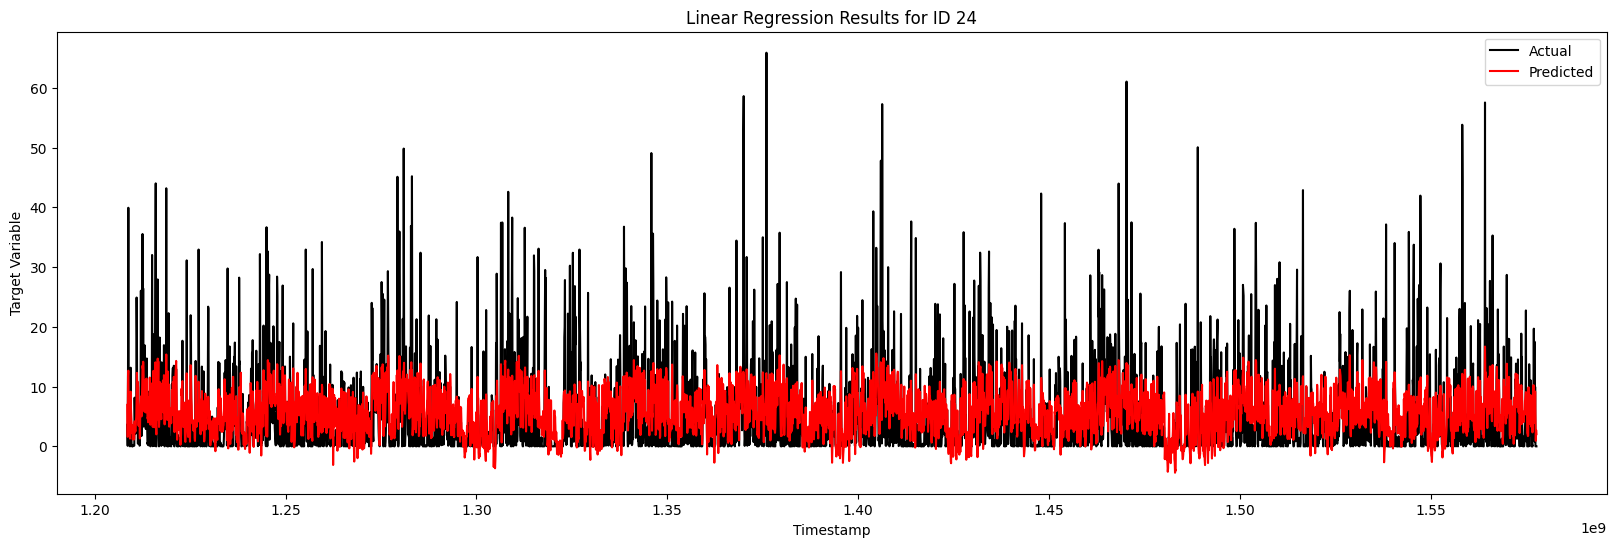

In [71]:
specific_id = 24
filtered_results = results_df[results_df['ID'] == specific_id]

plt.figure(figsize=(20, 6))

# Plot für unterschiedliche Zeitpunkte mit Linien
plt.plot(filtered_results['Timestamp'], filtered_results['Actual'], color='black', label='Actual')
plt.plot(filtered_results['Timestamp'], filtered_results['Predicted'], color='red', label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('Target Variable')
plt.title(f'Linear Regression Results for ID {specific_id}')
plt.legend()
plt.show()